In [46]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt


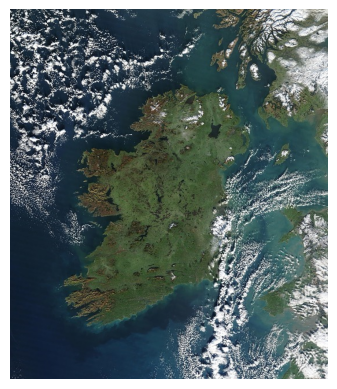

(640, 550, 3)


In [47]:
# Load an RGB image
image = io.imread('./img.jpg')

# Assuming 'image' is your loaded RGB image
plt.imshow(image)
plt.axis('off')  # Turn off axis
plt.show()


print(image.shape)

In [48]:
# Reshape the image to 2D
image = image.reshape(-1, 3)
print(image.shape)

(352000, 3)


In [49]:
# Kmeans
from sklearn.cluster import KMeans

# init: Method for initialization
#n_init: Number of times the k-means algorithm is run with different centroid seeds.
kmeans = KMeans(n_clusters=2, random_state=0, init="random", n_init=100).fit(image)



In [50]:
labels=kmeans.labels_
print(labels)
centroids=kmeans.cluster_centers_.astype(int)
print(centroids)

# Replace cluster labels with centroids
segmented_img = centroids[labels]
segmented_img = segmented_img.reshape(640,-1 , 3)


[1 1 1 ... 0 0 0]
[[186 193 195]
 [ 49  67  66]]


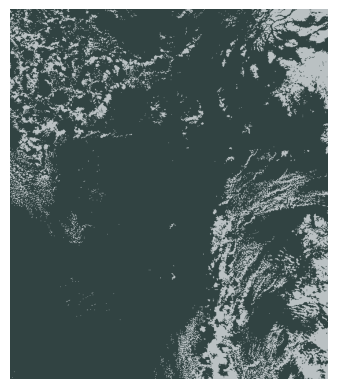

(640, 550, 3)


In [52]:
# Assuming 'image' is your loaded RGB image
plt.imshow(segmented_img)
plt.axis('off')  # Turn off axis
plt.show()
print(segmented_img.shape)

# # clip the border white pixels from the image
# segmented_img = segmented_img[0:640, 0:640]





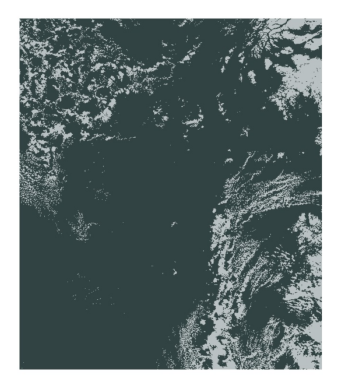

(779, 675, 3)


In [54]:
# Comparing Results
image_gold = io.imread('./gold.jpg')
# Clip white border to make the image in shape 640x550x3
plt.imshow(image_gold)
plt.axis('off')  # Turn off axis
plt.show()
print(image_gold.shape)

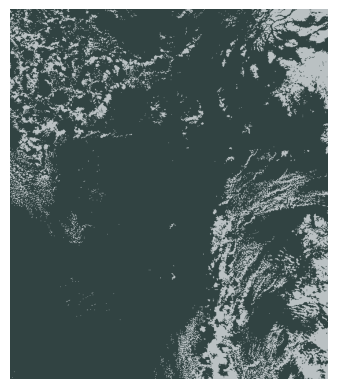

In [57]:
from matplotlib.image import imread
from sklearn.cluster import KMeans


def segment_image():
    image = imread("ireland.jpg")
    image_shape=image.shape
    # Write your code here.
    # Reshape the image to 2D
    image = image.reshape(-1, 3)

    # init: Method for initialization
    #n_init: Number of times the k-means algorithm is run with different centroid seeds.
    kmeans = KMeans(n_clusters=2, random_state=0, init="random", n_init=100).fit(image)

    labels=kmeans.labels_
    # Convert The Centroids to be int :D
    centroids=kmeans.cluster_centers_.astype(int) # 3D feature space each space is a color

    # Replace cluster labels with centroids
    segmented_img = centroids[labels]
    segmented_img = segmented_img.reshape(image_shape[0],image_shape[1], 3)

    return {"segmented_image":segmented_img,"clusterer":kmeans}

x=segment_image()
plt.imshow(x["segmented_image"])
plt.axis('off')  # Turn off axis
plt.show()
